# Modelos ARIMA, SARIMA. Diagnóstico.


por **Cibele Russo**

Baseado em 

- Moretting, P.A.; Toloi, C.M.C. “Análise de Séries Temporais”. Blucher, 2004.
- Ehlers, R.S. (2009) Análise de Séries Temporais, http://www.icmc.usp.br/~ehlers/stemp/stemp.pdf. Acessado em 28/06/2020.

Implementações:
- Brownlee, Jason. Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery, 2017.

Leituras adicionais:

- Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: principles and practice. OTexts.

- https://otexts.com/fpp2/non-seasonal-arima.html
- https://otexts.com/fpp2/seasonal-arima.html



**Vamos fazer uma pequena revisão da aula anterior?**

Sejam

- $\tilde{Z}_t = Z_t -\mu$


- $B^m Z_t = Z_{t-m}$ (Operador translação (defasagem, backshift))


- $F^m Z_t = Z_{t+m}$ (Operador translação para o futuro (forward))


- $\Delta = (1-B)$ (Operador diferença)


- $S Z_t = (1-B)^{-1}Z_t = \Delta^{-1}Z_t$ (Operador soma)






## Modelos autorregressivos - AR(p)

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \phi_{2}\tilde{Z}_{t-2} + \ldots + \phi_{p}\tilde{Z}_{t-p} + a_{t}$$

onde $a_{t}$ é um ruído branco.

Sendo o operador autorregressivo estacionário de ordem p dado por

$$\phi(B) = 1-\phi_1 B-\phi_2 B^2-\ldots -\phi_p B^p,$$

podemos reescrever o modelo AR(p) como

$$\phi(B)\tilde{Z}_{t} =  a_{t}$$


## Modelos de médias móveis - MA(q)

$$\tilde{Z}_{t} =  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

$$\tilde{Z}_{t} = (1-\theta_1 B - \ldots -\theta_q B^q) a_t $$

Assim

$$\tilde{Z}_{t}=\theta(B) a_t$$

onde $\theta(B) = 1-\theta_1 B-\ldots-\theta_q B^q$ é o operador de médias móveis de ordem $q$.


## Modelos ARMA(p,q)

Os modelos ARMA(p,q) são dados na forma

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \ldots + \phi_{p}\tilde{Z}_{t-p} +  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

ou podemos reescrever

$$\phi(B)\tilde{Z}_{t} = \theta(B) a_t$$

em que 

- $\phi(B)$ é o operador autorregressivo

- $\theta(B)$ é o operador de médias móveis


# Modelos ARIMA (p,d,q)


**Componentes de um modelo ARIMA (p,d,q):**

- **AR (p)**: Componentes autorregressivas, utilizam a relação de dependência entre a observação corrente e as observações em um período prévio

- **Integrado (d)**: Diferenças para tornar a série estacionária

- **MA (q)**: Componentes de médias móveis, utilizam a dependência entre uma obervação e um erro residual de um modelo de média móvel aplicado a observações em atraso.





Considere que $Z_t$ não é estacionária mas 

$$W_t = \Delta^d Z_t$$

é uma série estacionária e utilizamos portanto um modelo ARMA(p,q) para $W_t$, ou seja,

$$\phi(B) W_t = \theta(B) a_t.$$

Se $W_t$ for uma diferença de $Z_t$, então dizemos que $Z_t$ segue um modelo autorregressivo _integrado_ de médias móveis, ou um modelo ARIMA:

$$\phi(B) \Delta^d Z_t = \theta(B) a_t$$

de ordem (p,d,q) e escrevemos ARIMA (p,d,q) em que $p$ e $q$ são as ordens de $\phi(B)$ e $\theta(B)$, respectivamente.



# Modelos SARIMA (p,d,q)x(P, D,Q)m

- **SARIMA: ARIMA com sazonalidade**


- Componente sazonal se repete a cada $m$ observações ($m>1$).


- Com dados mensais e $m=12$, tipicamente espera-se que $Z_t$ dependa de $Z_{t-12}$ e talvez $Z_{t-24}$ além de $Z_{t-1}, Z_{t-2}$, ...


- Tomar a primeira diferença $\Delta Z_t = Z_t -Z_{t-1}$ não é suficiente para tornar a
série (aproximadamente) estacionária.


- Considere as diferenças sazonais 
$$\Delta_m Z_t = (1 - B^m )Z_t = Z_t - Z_{t-m}$$
sendo $m$ o periodo da sazonalidade.


- A D-ésima diferença sazonal é denotada por $\Delta^D_m$.


- Combinando-se diferenciação simples e sazonais obtem-se o operador $\Delta^d\Delta^D_m$.


**Componentes de um modelo SARIMA (p,d,q)x(P,D,Q)m:**

- $(p,d,q)$: componentes não-sazonais
- $(P,D,Q)_m$: componentes sazonais

Aqui $m$ é o período da sazonalidade.


$$\phi(B) \Phi(B^m ) W_t = \theta(B) \Theta(B^m ) a_ t$$

onde

- $\phi(B) = (1-\alpha_1 B-\ldots \alpha_p B^p)$

- $\Phi(B^m)= (1- \phi_1 B^m-\ldots - \phi_p B^{P_m})$

- $W_t = \Delta^d \Delta^D Z_t = (1-B)^d (1-B^m)^D Z_t$

- $\theta(B) = (1+\beta_1 B + \ldots + \beta_q B^q)$

- $\Theta(B^m) = (1+\theta_1 B^m+\ldots+\theta_Q B^{Q_m})$






**Exemplo:** Série mensal com 1 diferença simples e 1 sazonal com período 12


$\begin{array}{lll}
\Delta \Delta_{12} Z_t & =& (1-B)(1-B^{12})Z_t\\
&=& (1-B-B^{12}+B^{13}) Z_t\\
&=& Z_t-Z_{t-1}-Z_{t-12}+Z_{t-13}\end{array}$


**Exemplo:** Modelo $\mbox{ SARIMA(1,0,0)}\times(0,1,1)_{12}$


$\begin{array}{rll}
(1-\phi B)(1-B^{12})Z_t &=& (1-\theta B^{12})a_t\\
Z_t &=& Z_{t-12}+\phi(Z_{t-1}-Z_{t-13})+a_t-\theta a_{t-12}\end{array}$



**Observações**

- Na prática os valores de d e D em geral não serão muito maiores do que 1 e um número pequeno de coeficientes será suficiente.

-  Especificar os valores de d e D que tornam a série (aproximadamente) estacionária e remove a maior parte da sazonalidade.

-  Os valores de p, P, q e Q devem ser especificados com base nas funções de autocorrelação e autocorrelação parcial da série diferenciada.

-  Os valores de P e Q são especificados basicamente olhando-se para as defasagens $k = m, 2m, \ldots.$ 

## Aplicação

In [1]:
!pip show statsmodels

Name: statsmodels
Version: 0.12.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: c:\users\nasse\anaconda3\lib\site-packages
Requires: pandas, scipy, numpy, patsy
Required-by: pmdarima


In [2]:
!pip show pmdarima

Name: pmdarima
Version: 1.8.2
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: None
Author-email: None
License: MIT
Location: c:\users\nasse\appdata\roaming\python\python38\site-packages
Requires: scikit-learn, numpy, statsmodels, Cython, setuptools, scipy, urllib3, joblib, pandas
Required-by: 


<AxesSubplot:>

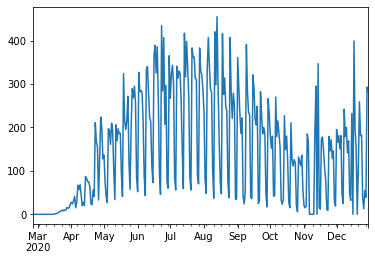

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0) 

pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'

# Leitura dos dados de COVID-19 no estado de SP em 2020 - vamos trabalhar com as mortes
covidSP = pd.read_csv('covidSP.csv', index_col='date', parse_dates=True)

idx = pd.date_range(start=covidSP.index.min(), end=covidSP.index.max(), freq='D')
covidSP = covidSP.reindex(idx)
covidSP.fillna(0,inplace=True)

covidSP['deaths'].plot()

In [4]:
covidSP.index.max()


Timestamp('2020-12-30 00:00:00', freq='D')

Vamos considerar a decomposição em sazonalidade e tendência em um modelo aditivo, nesse caso porque temos muitos zeros.

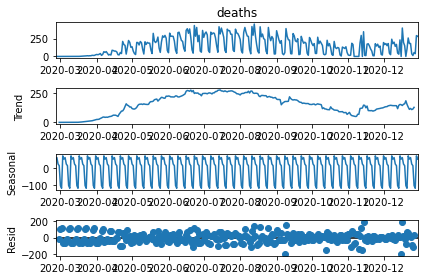

In [5]:
result = seasonal_decompose(covidSP['deaths'], model='additive')
result.plot();

Há sazonalidade nos dados, devido à sistemática de notificações

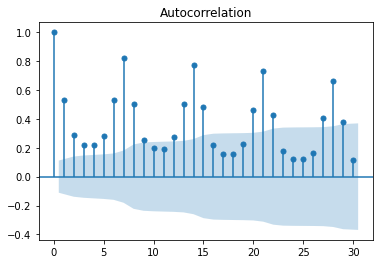

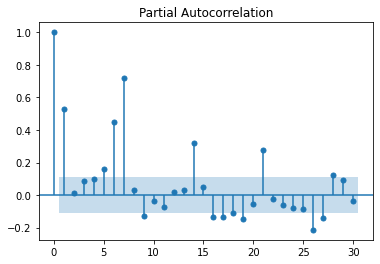

In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)

# Correlograma

plot_acf(covidSP['deaths'], lags=30)
plot_pacf(covidSP['deaths'], lags=30)
plt.show()

In [7]:
# Ajuste de modelo SARIMA 

auto_arima(covidSP['deaths'],seasonal=True,m=7).summary()


stepwise_fit = auto_arima(covidSP['deaths'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=7,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3579.716, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3825.903, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3563.494, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3581.821, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3823.921, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=3808.539, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=3519.108, Time=0.51 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=3488.255, Time=0.85 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=3486.546, Time=0.42 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=3683.983, Time=0.16 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=3488.166, Time=0.80 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=3635.827, Time=0.27 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=3454.120, Time=0.70 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  309
Model:             SARIMAX(6, 1, 0)x(2, 0, [1, 2], 7)   Log Likelihood               -1680.404
Date:                                Thu, 12 Aug 2021   AIC                           3382.808
Time:                                        12:20:26   BIC                           3423.839
Sample:                                             0   HQIC                          3399.214
                                                - 309                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9586      0.041    -23.251      0.000      -1.039      -0.878
ar.L2         -0.8940      0.072    -12.351      0.000      -1.036      -0.752
ar.L3         -0.7739      0.085     -9.063      0.000      -0.941      -0.607
ar.L4         -0.7289      0.113     -6.473      0.000      -0.950      -0.508
ar.L5         -0.6969      0.102     -6.850      0.000      -0.896      -0.497
ar.L6         -0.5265      0.112     -4.703      0.000      -0.746      -0.307
ar.S.L7        1.2768      0.159      8.045      0.000       0.966       1.588
ar.S.L14      -0.3184      0.148     -2.154      0.031      -0.608      -0.029
ma.S.L7       -1.5021      0.105    -14.307      0.000      -1.708      -1.296
ma.S.L14       0.7057      0.090      7.857      0.000       0.530       0.882
sigma2      3179.6042    173.717     18.303      0.000    2839.126    3520.083
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               399.18
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.69   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
len(covidSP)

309

In [9]:
len(covidSP)*0.9

278.1

In [10]:
treino = covidSP.iloc[:278]
teste = covidSP.iloc[278:]

In [55]:
modelo = SARIMAX(treino['deaths'],order=(6,1,0),seasonal_order=(2,0,2,7))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                 deaths   No. Observations:                  278
Model:             SARIMAX(6, 1, 0)x(2, 0, [1, 2], 7)   Log Likelihood               -1494.275
Date:                                Thu, 12 Aug 2021   AIC                           3010.551
Time:                                        12:25:36   BIC                           3050.415
Sample:                                    02-26-2020   HQIC                          3026.546
                                         - 11-29-2020                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9388      0.041    -23.134      0.000      -1.018      -0.859
ar.L2         -0.8829      0.064    -13.747      0.000      -1.009      -0.757
ar.L3         -0.7859      0.075    -10.434      0.000      -0.934      -0.638
ar.L4         -0.7483      0.097     -7.681      0.000      -0.939      -0.557
ar.L5         -0.7359      0.090     -8.196      0.000      -0.912      -0.560
ar.L6         -0.5809      0.096     -6.035      0.000      -0.770      -0.392
ar.S.L7        1.2680      0.149      8.535      0.000       0.977       1.559
ar.S.L14      -0.3185      0.137     -2.319      0.020      -0.588      -0.049
ma.S.L7       -1.5766      0.099    -15.995      0.000      -1.770      -1.383
ma.S.L14       0.7724      0.091      8.469      0.000       0.594       0.951
sigma2      2704.7768    148.595     18.202      0.000    2413.536    2996.017
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):               600.97
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               2.65   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
resultado.fittedvalues

2020-02-26      0.000000
2020-02-27      0.000000
2020-02-28      0.000000
2020-02-29      0.000000
2020-03-01      0.000000
                 ...    
2020-11-25    143.262610
2020-11-26    144.005203
2020-11-27     92.903260
2020-11-28     86.410148
2020-11-29     36.013789
Freq: D, Length: 278, dtype: float64

In [57]:
# Obtain predicted values
inicio=len(treino)
fim=len(treino)+len(teste)-1
previsões = resultado.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('Previsões SARIMA(0,1,1)(1,0,1,7) ')
previsões.index = teste.index


In [58]:
previsões

2020-11-30     42.176966
2020-12-01     99.008251
2020-12-02    148.568236
2020-12-03    182.690386
2020-12-04     91.012704
2020-12-05    117.873890
2020-12-06     40.676803
2020-12-07     47.087899
2020-12-08     93.131591
2020-12-09    157.522392
2020-12-10    200.846521
2020-12-11     77.555141
2020-12-12    129.452811
2020-12-13     45.984274
2020-12-14     51.130985
2020-12-15    106.741659
2020-12-16    168.087945
2020-12-17    213.930272
2020-12-18     79.463113
2020-12-19    146.438710
2020-12-20     52.346070
2020-12-21     59.153107
2020-12-22    123.321853
2020-12-23    177.921678
2020-12-24    222.310830
2020-12-25     88.907557
2020-12-26    160.915962
2020-12-27     61.197809
2020-12-28     70.361703
2020-12-29    138.446394
2020-12-30    186.417460
Freq: D, Name: Previsões SARIMA(0,1,1)(1,0,1,7) , dtype: float64

Passar <tt> dynamic = False </tt> significa que as previsões em cada ponto são geradas usando o histórico completo até aquele ponto (todos os valores defasados).

Passar <tt> typ = 'levels' </tt> prevê os níveis das variáveis endógenas originais. Se tivéssemos usado o padrão <tt> typ = 'linear' </tt>, teríamos visto previsões lineares em termos de variáveis endógenas diferenciadas.

Para obter mais informações sobre esses argumentos, visite https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

In [59]:
for i in range(len(previsões)):
    print(f"predicted={previsões[i]:<11.10}, expected={teste['deaths'][i]}")

predicted=42.17696561, expected=19.0
predicted=99.0082513 , expected=195.0
predicted=148.5682362, expected=166.0
predicted=182.6903855, expected=181.0
predicted=91.01270368, expected=151.0
predicted=117.8738903, expected=181.0
predicted=40.67680313, expected=46.0
predicted=47.08789898, expected=25.0
predicted=93.13159149, expected=242.0
predicted=157.5223921, expected=179.0
predicted=200.846521 , expected=200.0
predicted=77.55514095, expected=141.0
predicted=129.4528106, expected=169.0
predicted=45.984274  , expected=47.0
predicted=51.13098526, expected=32.0
predicted=106.7416593, expected=232.0
predicted=168.0879449, expected=0.0
predicted=213.9302715, expected=399.0
predicted=79.46311298, expected=197.0
predicted=146.43871  , expected=151.0
predicted=52.34606995, expected=0.0
predicted=59.15310697, expected=107.0
predicted=123.3218532, expected=259.0
predicted=177.921678 , expected=181.0
predicted=222.31083  , expected=182.0
predicted=88.90755703, expected=37.0
predicted=160.9159624,

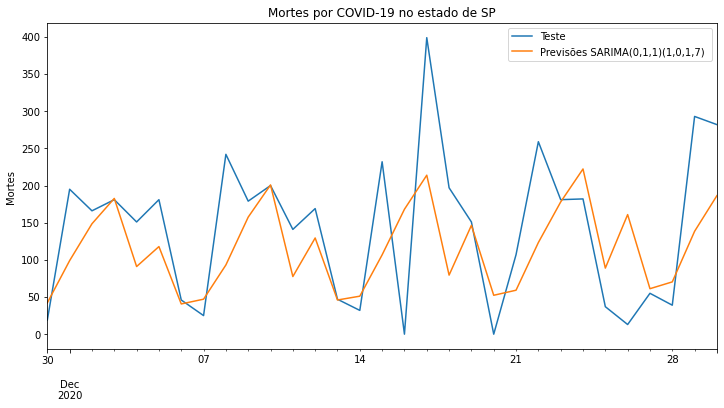

In [60]:
# Plot predictions against known values
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes '
xlabel=''

ax = teste['deaths'].plot(legend=True,figsize=(12,6),title=title, label='Teste')
previsões.plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

<AxesSubplot:>

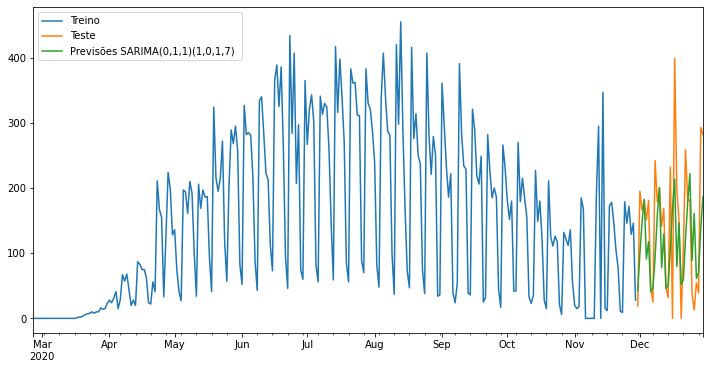

In [61]:
treino['deaths'].plot(legend=True, label='Treino')
teste['deaths'].plot(legend=True, label='Teste')
previsões.plot(legend=True, figsize=(12,6))

### Previsões para dados cujos tempos ainda não estão nas bases

In [62]:
modelo = SARIMAX(covidSP['deaths'],order=(6,1,0),seasonal_order=(2,0,2,7))
resultados = modelo.fit()
fcast = resultados.predict(len(covidSP),len(covidSP)+14,typ='levels').rename('Previsões SARIMA(4,0,0)(2,1,0,7)')

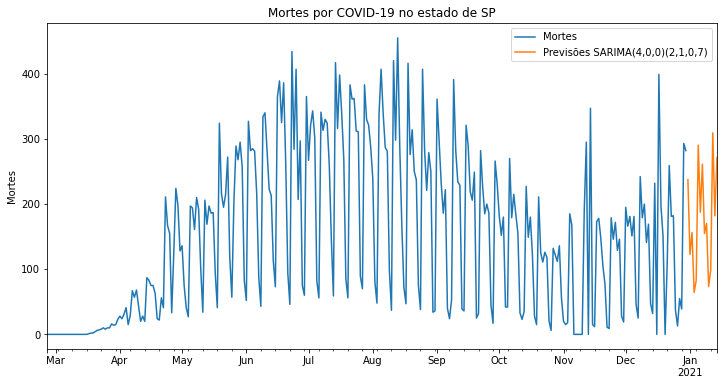

In [63]:
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes'
xlabel=''

ax = covidSP['deaths'].plot(legend=True,figsize=(12,6),title=title, label='Mortes')
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

**Exercício: É possível melhorar as previsões para os dados de PETR4 com o SARIMA sazonal?**

## Diagnóstico em modelos SARIMA

### Métricas

In [64]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(teste['deaths'], previsões)
print(f'EQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

EQM SARIMA(0,1,1)(1,0,1,7): 7176.079886


In [65]:
from statsmodels.tools.eval_measures import rmse

error = rmse(teste['deaths'], previsões)
print(f'REQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

REQM SARIMA(0,1,1)(1,0,1,7): 84.71174585


### Análise de resíduos

Considere inicialmente um modelo ARIMA

$$\phi(B) W_t = \theta(B) a_t$$ com $W_t = \Delta^d Z_t$ supondo que $a_t$ é um ruído branco.

Se o modelo for verdadeiro, então os erros verdadeiros $a_t = \theta^{-1}(B) \phi(B) W_t$ devem ser um ruído branco.

Uma análise equivalente poderia ser feita para modelos mais gerais SARIMA.

Quando o modelo é estimado, ou seja, quando são obtidos $\widehat{\theta}$ e $\widehat{\phi}$, as quantidades

$$\widehat{a}_t = \widehat{\theta}^{-1}(B) \widehat{\phi}(B) W_t$$

são chamadas de **resíduos**. Se o modelo for correto, eles devem ser aproximadamente não correlacionados.

Uma forma de analisar os resíduos ajustados é simplesmente considerar

$$r_t = Z_t - \widehat{Z}_t$$

e podemos analisar a distribuição, estatísticas descritivas, a autocorrelação dos resíduos e verificar se existe algum padrão nos mesmos.

Leitura adicional: https://otexts.com/fpp2/residuals.html

In [66]:
# Uma forma de obter os resíduos pelo ajuste do modelo

resíduos = resultados.resid

In [67]:
resíduos.describe()

count    309.000000
mean       1.073700
std       55.416667
min     -290.775853
25%      -24.562298
50%        0.000000
75%       24.505486
max      291.845177
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1eab998f760>,
 'caps': [<matplotlib.lines.Line2D at 0x1eab998fdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eab998f400>],
 'medians': [<matplotlib.lines.Line2D at 0x1eab995c4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eab995c820>],
 'means': []}

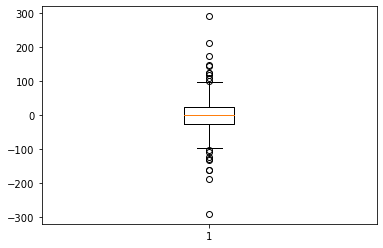

In [68]:
plt.boxplot(resíduos)

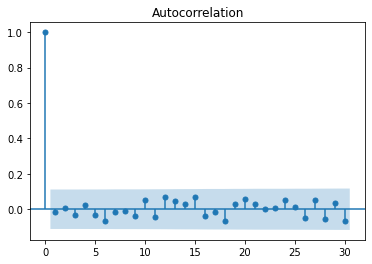

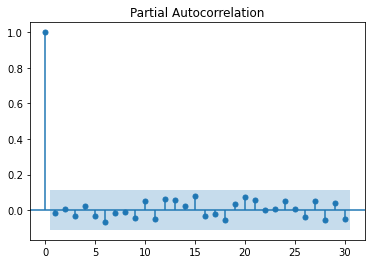

In [69]:
plot_acf(resíduos, lags=30)
plot_pacf(resíduos, lags=30)
plt.show()

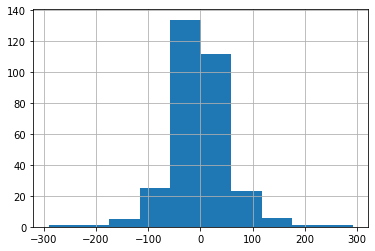

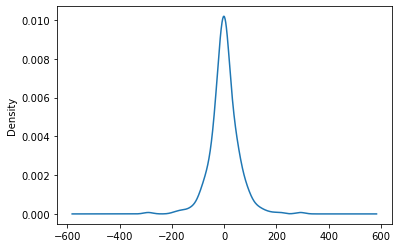

In [70]:
from matplotlib import pyplot


resíduos.hist()

pyplot.show()
resíduos.plot(kind='kde')
pyplot.show()

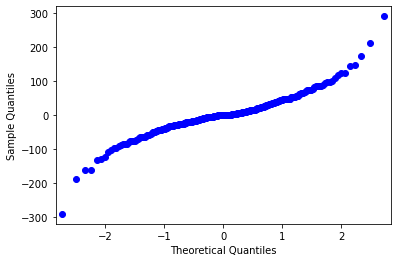

In [71]:
from statsmodels.graphics.gofplots import qqplot

qqplot(resíduos)
pyplot.show()

**Exercício: O que aconteceria com os resíduos se um modelo incorreto tivesse sido ajustado?**